Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**
[Rebrickable](https://rebrickable.com/downloads/)

<img src='Day 73/LEGO/assets/bricks.jpg'>

# Import Statements

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [83]:
colors_df = pd.read_csv('Day 73/LEGO/data/colors.csv')
theme_df = pd.read_csv('Day 73/LEGO/data/themes.csv')
sets_df = pd.read_csv('Day 73/LEGO/data/sets.csv')

In [77]:
colors_df.nunique()

id          186
name        186
rgb         160
is_trans      2
dtype: int64

In [78]:
colors_df.shape

(186, 4)

In [79]:
colors_df['name'].nunique()

186

In [80]:
colors_df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,151,151,151
t,35,35,35


In [81]:
colors_df.is_trans.value_counts()

f    151
t     35
Name: is_trans, dtype: int64

In [75]:
# colors_df_trans = colors_df.where(colors_df['is_trans'] == 't')
# colors_df_trans.dropna(axis=0, inplace=True)
# colors_df_trans

# Lego Sets Vs. Lego Themes

### Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, ### Batman, Harry Potter and many more
<img src='Day 73/LEGO/assets/lego_themes.png'>


### A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.
<img src='Day 73/LEGO/assets/lego_sets.png'>

## Exploring Lego Set    

In [93]:
sets_df.sort_values('year')
# This shows us the first lego set created was in 1949 and it had 12 parts in the set. It was called the Small Doors and Windows Set

,set_num,name,year,theme_id,num_parts
10027,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
10016,700.2-1,Large Gift Set (ABB),1949,365,178
10021,700.3-1,Medium Gift Set (ABB),1949,365,142
10003,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
10026,700.A-1,Small Brick Set (ABB),1949,371,24
...,...,...,...,...,...
3518,31118-1,Surfer Beach House,2021,672,564
15944,IKEAKIT-1,BYGGLEK Children Kit,2021,501,0
3517,31116-1,Safari Wildlife Tree House,2021,672,0
7330,5006275-1,Gel Pen 6 Pack,2021,688,25


In [110]:
sets_df[(sets_df.year == 1949)]

,set_num,name,year,theme_id,num_parts
10003,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
10016,700.2-1,Large Gift Set (ABB),1949,365,178
10021,700.3-1,Medium Gift Set (ABB),1949,365,142
10026,700.A-1,Small Brick Set (ABB),1949,371,24
10027,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [109]:
sets_df.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15754,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
318,10276-1,Colosseum,2020,673,9036
11723,75192-1,UCS Millennium Falcon,2017,171,7541
11050,71043-1,Hogwarts Castle,2018,246,6020
296,10256-1,Taj Mahal,2017,673,5923


# Visualize Sets By Year 

In [117]:
sets_by_year = sets_df.groupby(['year'])['set_num'].count()
sets_by_year

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    837
2018    831
2019    881
2020    826
2021    334
Name: set_num, Length: 71, dtype: int64

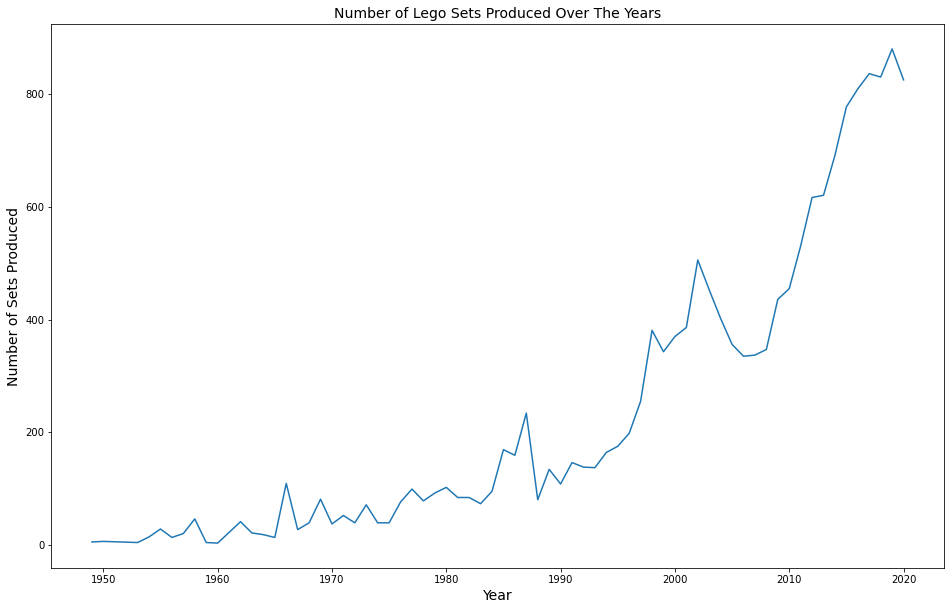

In [124]:
plt.figure(figsize=(16,10))
plt.plot(sets_by_year[:-1])
plt.title('Number of Lego Sets Produced Over The Years', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Sets Produced',fontsize=14)
plt.show()

In [125]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})

In [126]:
themes_by_year

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,88
2018,93
2019,79


In [127]:
themes_by_year.rename(columns={'theme_id': 'nr_themes'}, inplace=True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


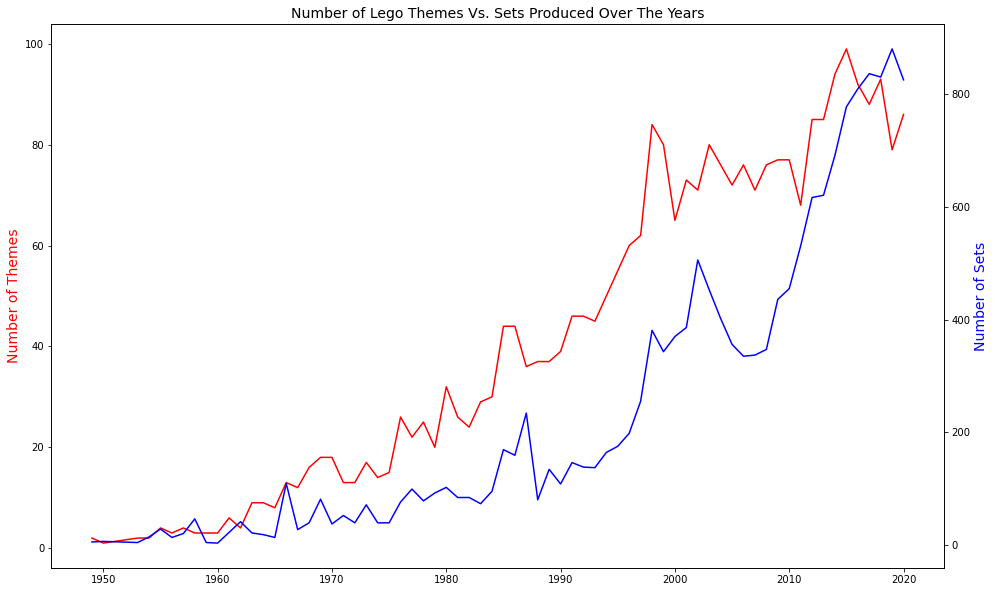

In [143]:
plt.figure(figsize=(16,10))

ax1 = plt.gca()
ax2= ax1.twinx()


ax1.plot(themes_by_year[:-1], color='r')
ax2.plot(sets_by_year[:-1], color='b')
plt.title('Number of Lego Themes Vs. Sets Produced Over The Years', fontsize=14)
ax1.set_ylabel('Number of Themes', color='red', fontsize=14)
ax2.set_ylabel("Number of Sets", color='blue', fontsize=14)


plt.xlabel('Year', fontsize=14)
plt.show()


In [146]:
parts_per_set = sets_df.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set.rename(columns={'num_parts': 'avg_num_parts'}, inplace=True)
parts_per_set

,avg_num_parts
year,
1949,99.600000
1950,1.000000
1953,12.500000
1954,8.357143
1955,16.107143
...,...
2017,212.892473
2018,206.044525
2019,198.167991


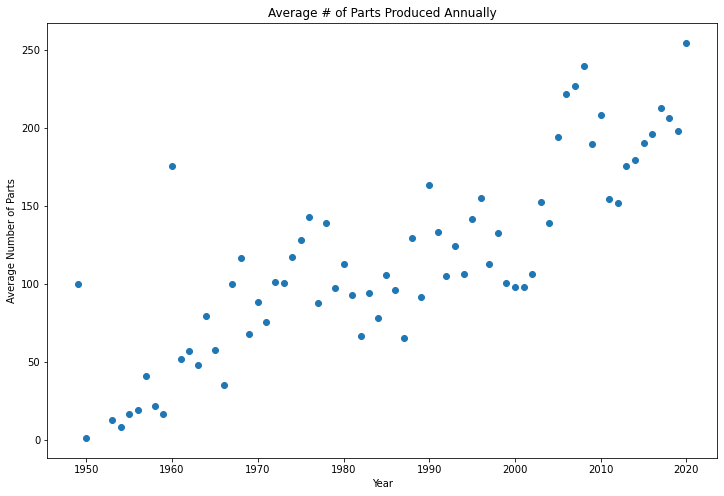

In [153]:
plt.figure(figsize=(12,8))
plt.scatter(parts_per_set.index[:-1], parts_per_set['avg_num_parts'][:-1])
plt.xlabel('Year')
plt.title("Average # of Parts Produced Annually")
plt.ylabel('Average Number of Parts')
plt.show()

# Theme Datasets

<img src='Day 73/LEGO/assets/rebrickable_schema.png'>

In [157]:
theme_df.nunique()

id           598
name         425
parent_id     68
dtype: int64

In [171]:
theme_df[theme_df.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
149,158,Star Wars,NaN
172,209,Star Wars,207.0
209,261,Star Wars,258.0


In [174]:
theme_df.head(5)

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [170]:
sets_df[sets_df.theme_id == 261]

,set_num,name,year,theme_id,num_parts
15351,9748-1,Droid Developer Kit,1999,261,658
15357,9754-1,Dark Side Developer Kit,2000,261,578


# Merging Data Based on ID 

In [175]:
set_theme_count = sets_df['theme_id'].value_counts()
set_theme_count

501    980
158    763
494    428
435    384
503    373
      ... 
383      1
519      1
215      1
455      1
414      1
Name: theme_id, Length: 570, dtype: int64

In [176]:
set_theme_count = pd.DataFrame({'id': set_theme_count.index, 'set_count': set_theme_count.values})
set_theme_count.head()

,id,set_count
0,501,980
1,158,763
2,494,428
3,435,384
4,503,373


In [177]:
merged_df = pd.merge(set_theme_count, theme_df, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,501,980,Gear,NaN
1,158,763,Star Wars,NaN
2,494,428,Friends,NaN


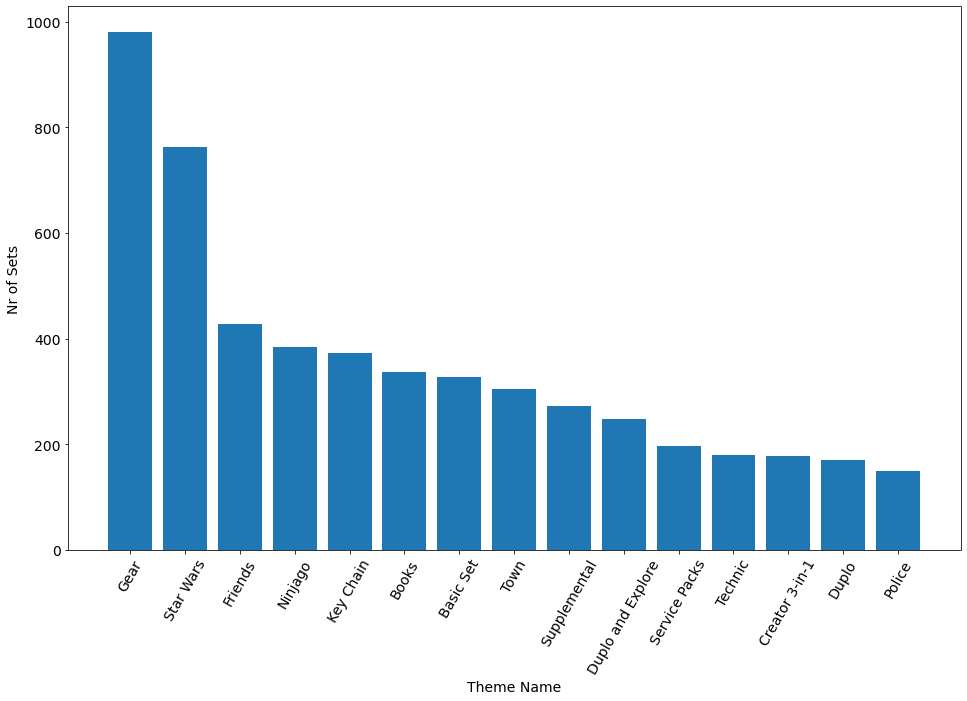

In [189]:
plt.figure(figsize=(16,10))
plt.bar(merged_df.name[:15], merged_df.set_count[:15])
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
plt.show()